In [1]:
from tools import *

devices: PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [2]:
prepare_dirs(task='training')

Downloading...
From (original): https://drive.google.com/uc?id=1pzFs93wfKkd4MZTATkQB-_oypFafq7iL
From (redirected): https://drive.google.com/uc?id=1pzFs93wfKkd4MZTATkQB-_oypFafq7iL&confirm=t&uuid=992c0da0-6ed9-4cd6-b94b-7ee41c1de6aa
To: D:\virtualenv\src\thesis\cmapss\training\lstm\input\CMAPSSData\FD002.zip
100%|█████████████████████████████████████████████████████████████████████████████| 76.5M/76.5M [00:09<00:00, 8.15MB/s]


Extracting FD002.zip...
Extraction complete: ./input\CMAPSSData
Input directory
'./input'
URL input dataset
'https://drive.google.com/file/d/1LU1DQuv7_CzBy2_Abgjg3HsvNDme361O/view?usp=drive_link'
Input dataset directory
'./input\\CMAPSSData'
Output directory
'./working'
Output models directory
'./working\\models'
Output plots directory
'./working\\plots'


In [3]:
data_ftype = '.npy'

ts_train_features_name = 'ts_train_features' + data_ftype
ts_train_features_path = os.path.join(dataset_dir, ts_train_features_name)
ts_train_targets_name = 'ts_train_targets' + data_ftype
ts_train_targets_path = os.path.join(dataset_dir, ts_train_targets_name)

ts_val_features_name = 'ts_val_features' + data_ftype
ts_val_features_path = os.path.join(dataset_dir, ts_val_features_name)
ts_val_targets_name = 'ts_val_targets' + data_ftype
ts_val_targets_path = os.path.join(dataset_dir, ts_val_targets_name)

ts_test_features_name = 'ts_test_features' + data_ftype
ts_test_features_path = os.path.join(dataset_dir, ts_test_features_name)
ts_test_targets_name = 'ts_test_targets' + data_ftype
ts_test_targets_path = os.path.join(dataset_dir, ts_test_targets_name)

ts_train_features = np.load(ts_train_features_path)
ts_train_targets = np.load(ts_train_targets_path)

ts_val_features = np.load(ts_val_features_path)
ts_val_targets = np.load(ts_val_targets_path)

ts_test_features = np.load(ts_test_features_path)
ts_test_targets = np.load(ts_test_targets_path)

In [4]:
nprint("Training features shape", ts_train_features.shape)
nprint("Training targets shape", ts_train_targets.shape)
nprint("Validation features shape", ts_val_features.shape)
nprint("Validation targets shape", ts_val_targets.shape)
nprint("Testing features shape", ts_test_features.shape)
nprint("Testing targets shape", ts_test_targets.shape)

Training features shape
(39055, 20, 15)
Training targets shape
(39055,)
Validation features shape
(9764, 20, 15)
Validation targets shape
(9764,)
Testing features shape
(1289, 20, 15)
Testing targets shape
(259,)


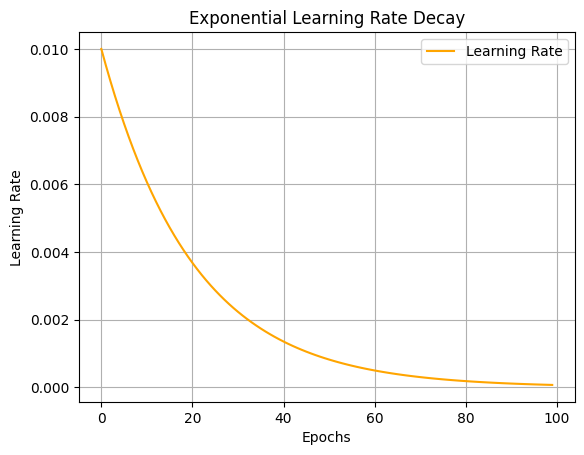

In [5]:
plot_lrdecay()

In [6]:
model = RULEstimator.get_model(
    dataset_name=dataset_name,
    window_length=window_length,
    num_features=ts_train_features.shape[2],
    num_targets=1 if len(ts_train_targets.shape)==1 else ts_train_targets.shape[1],
    loss=loss(),
    optimizer=optimizer()
).build()
model.summary()


start_time = time.time()
nprint('Training started: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
history = model.fit(
    ts_train_features, 
    ts_train_targets, 
    epochs=epochs,
    validation_data=(
        ts_val_features, 
        ts_val_targets
    ),
    callbacks=callbacks(
        scheduler=scheduler, 
        verbose=verbose, 
        stopping_metric='val_loss', 
        patience=int((20*epochs)/100)
    ),
    batch_size=batch_size, 
    verbose=verbose
)
nprint('Training ended: ', time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()))
end_time = time.time()
training_duration = end_time - start_time
nprint('Training duration', '{:.2f} seconds'.format(training_duration))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 16, 128)             │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 12, 96)              │          61,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 8, 32)               │          15,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,217 (379.75 KB)

 Trainable params: 97,217 (379.75 KB)

 Non-trainable params: 0 (0.00 B)

Training started: 
'2024-11-28 18:51:37'

Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 5791.7363 - val_loss: 1163.6906 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.00951229424500714.
Epoch 2/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 916.3318 - val_loss: 808.2705 - learning_rate: 0.0095

Epoch 3: LearningRateScheduler setting learning rate to 0.009048374180359595.
Epoch 3/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 782.0145 - val_loss: 776.2163 - learning_rate: 0.0090

Epoch 4: LearningRateScheduler setting learning rate to 0.008607079764250578.
Epoch 4/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 737.5673 - val_loss: 716.0769 - learning_rate: 0.0086

Epoch 5: LearningRateScheduler setting learning rate to 0.008187307530779819.
Epoch 5/100
306/306 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 726.7536 - val_loss: 682.2010 - learning_rate: 0.0082



In [7]:
modeltype = 'LSTM'

lstm_model_name = '{}_{}'.format(dataset_name, modeltype)
lstm_model_files_dir = os.path.join(out_models_dir, lstm_model_name)
os.makedirs(lstm_model_files_dir)

In [8]:
ftype = 'keras'
lstm_model_file_name = '{}.{}'.format(lstm_model_name, ftype)
lstm_model_path = os.path.join(lstm_model_files_dir, lstm_model_file_name)
model.save(filepath=lstm_model_path)
nprint('LSTM model path', lstm_model_path)

LSTM model path
'./working\\models\\FD002_LSTM\\FD002_LSTM.keras'


LSTM model history path
'./working\\models\\FD002_LSTM\\FD002_LSTM_history.json'
      loss   val_loss  learning_rate  epoch
138.514999 182.736679       0.000087     95
138.057571 181.778809       0.000082     96
138.065170 181.505646       0.000078     97
137.443100 182.363739       0.000074     98
137.041901 181.259933       0.000071     99


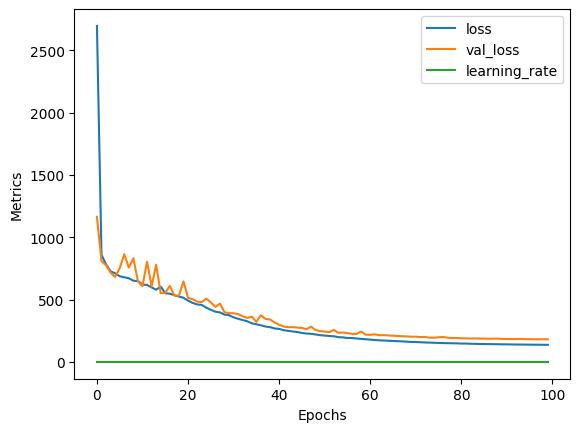

In [9]:
ftype = 'json'
lstm_model_history_name = '{}_{}_{}.{}'.format(dataset_name, modeltype, 'history', ftype) 
lstm_model_history_path = os.path.join(lstm_model_files_dir, lstm_model_history_name)
with open(lstm_model_history_path, "w") as file: 
    json.dump({'history': history.history}, file, indent=4)
nprint('LSTM model history path', lstm_model_history_path)
display_training_performance(history)

In [10]:
ftype = 'zip'
shutil.make_archive(lstm_model_files_dir, ftype, lstm_model_files_dir)
shutil.rmtree(lstm_model_files_dir)